# 基于理性、适应与信任的人机二元协作博弈影响研究

In [2]:
from functions import *
from agent import *
from collaborate_rescue import *
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
from functools import reduce
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [41]:
# 求归一化信任，in:array，out:array
def get_trust(array):
    return (np.exp(array)-np.exp(-array))/(np.exp(array)+np.exp(-array))

## 人类理性对协作绩效的影响

In [2]:
# 机器人适应性作为调节变量
itas = np.linspace(0.1,1,10)
ws = [0.2, 0.5, 0.8]
itas, ws = np.meshgrid(itas, ws)
print('itas=', itas, '\n',  'ws=', ws)

itas= [[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]] 
 ws= [[0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]]


In [3]:
result = np.zeros((3, 10))
for i in range(30):
    tcs = []
    print('cycle', i)
    for ita, w in zip(itas.reshape(30,), ws.reshape(30,)):
        tc = collaborate_rescue_1(0.5, ita, w, 'q', 200).task_count.sum()
        tcs.append(tc)
    result = result + np.array(tcs).reshape(3, 10)
result /= 30
result = np.round(result, decimals=2)
print('result=', result)

cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
result= [[15.33333333 16.16666667 18.06666667 19.13333333 21.1        20.26666667
  19.83333333 19.46666667 20.86666667 20.53333333]
 [14.33333333 16.26666667 19.86666667 20.86666667 21.9        19.63333333
  19.93333333 20.63333333 20.66666667 21.46666667]
 [13.73333333 18.23333333 18.13333333 20.6        21.16666667 21.53333333
  21.2        19.6        21.3        19.7       ]]


In [4]:
pd.DataFrame(result).to_csv('itas.csv', index=None)

## 机器人适应性对协作绩效的影响

In [6]:
# 人类理性作为调节变量
ws = np.linspace(0.1,1,10)
itas = [0.2, 0.5, 0.8]
ws, itas = np.meshgrid(ws, itas)
print('ws=', ws, '\n',  'itas=', itas)

ws= [[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]] 
 itas= [[0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]]


In [ ]:
result = np.zeros((3, 10))
for i in range(30):
    tcs = []
    print('cycle', i)
    for ita, w in zip(itas.reshape(30,), ws.reshape(30,)):
        tc = collaborate_rescue_1(0.5, ita, w, 'q', 200).task_count.sum()
        tcs.append(tc)
    result = result + np.array(tcs).reshape(3, 10)
result /= 30
result = np.round(result, decimals=2)
print('result=', result)

In [20]:
pd.DataFrame(tcs).to_csv('ws.csv', index=None)

## 个体特质对人机信任的影响

In [52]:
itas = [0.1, 0.5, 1]
ws = [0.1, 0.5, 1]
itas, ws = np.meshgrid(itas, ws)
print('itas=', itas, '\n',  'ws=', ws)

itas= [[0.1 0.5 1. ]
 [0.1 0.5 1. ]
 [0.1 0.5 1. ]] 
 ws= [[0.1 0.1 0.1]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


In [55]:
ts = []
cts = []
ets = []
for ita, w in zip(itas.reshape(9,), ws.reshape(9,)):
    print('running...', ita, w)
    result = collaborate_rescue_1(0.5, ita, w, 'q', 2000)
    ts.append(result.human_trust.values)
    cts.append(result.human_ctrust.values)
    ets.append(result.human_etrust.values)

running... 0.1 0.1
running... 0.5 0.1
running... 1.0 0.1
running... 0.1 0.5
running... 0.5 0.5
running... 1.0 0.5
running... 0.1 1.0
running... 0.5 1.0
running... 1.0 1.0


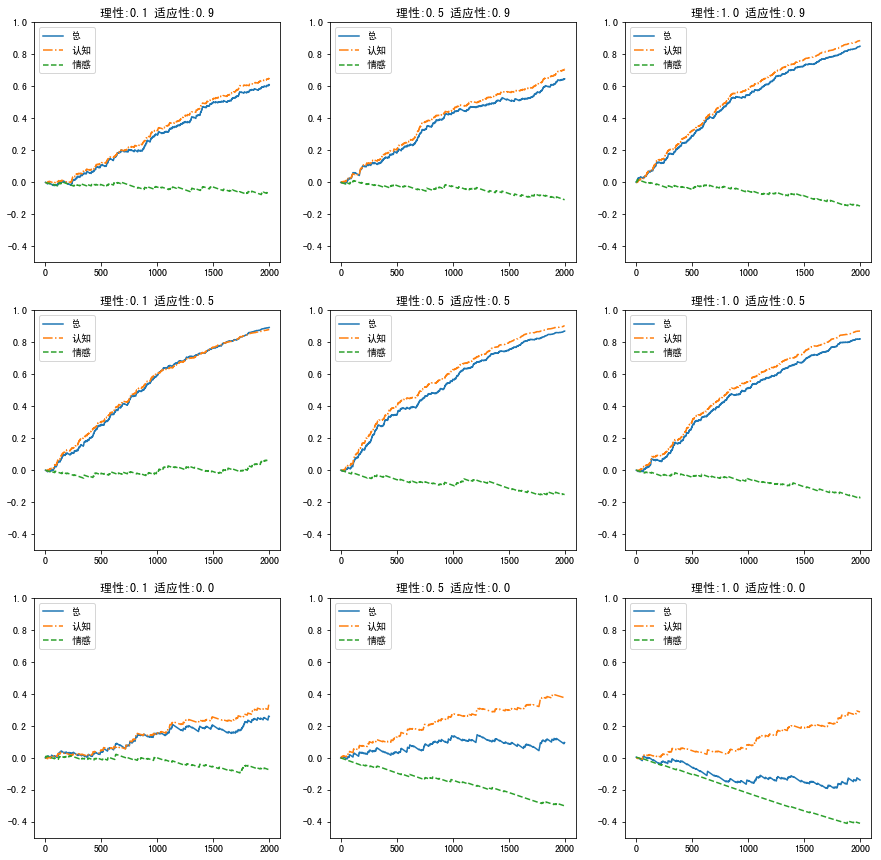

In [56]:
fig = plt.figure(figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    plt.title('理性:%s 适应性:%s' % (str(itas.reshape(9,)[i]), str(1-ws.reshape(9,)[i])))
    plt.plot(get_trust(ts[i]), '-')
    plt.plot(get_trust(cts[i]), '-.')
    plt.plot(get_trust(ets[i]), '--')
    plt.legend(['总', '认知', '情感'], loc='upper left')
    plt.ylim(-0.5, 1)

## 人机信任与协作绩效的交互影响

In [ ]:
信任阈值0.5、理性1、适应0.5  P->T，T-x->P
信任阈值0.5、理性0.5、适应0.5  P->T，T-x->P


In [58]:
result = collaborate_rescue_1(0.5, 0.5, 0.5, 'q', 2000)
cycle = list(range(1,101)) * 20
cycle = [[cycle[i+100*j] for j in range(20)] for i in range(100)]
cycle = reduce(lambda x,y:x+y, cycle)
cycle.pop()
result['cycle'] = cycle
# result[['human_trust']]

In [59]:
result.human_trust = get_trust(result.human_trust)

In [60]:
result = result[['cycle', 'human_trust', 'task_count']]

In [61]:
result = result.groupby('cycle')['human_trust', 'task_count'].agg({'human_trust': 'mean', 'task_count': 'sum'}).reset_index()

In [62]:
result.rename(columns={'human_trust': 'T', 'task_count': 'P'}, inplace=True)

In [63]:
result

,cycle,T,P
0,1,-0.005250,0
1,2,-0.007250,3
2,3,-0.005250,3
3,4,0.009499,3
4,5,0.035483,3
5,6,0.043223,1
6,7,0.034736,0
7,8,0.042473,3
8,9,0.057433,4
9,10,0.081319,3


In [64]:
result[['T', 'P']].to_csv('muad.csv', index=None)